# Autoencoders com Python: Remoção de Ruído no Dataset MNIST

## Introdução
Um **Autoencoder** é uma rede neural projetada para aprender uma representação comprimida dos dados (espaço latente) e reconstruí-los. Neste notebook, aplicaremos um Autoencoder para remover ruídos das imagens do dataset MNIST.

### Objetivo
- Aprender a criar e treinar um Autoencoder.
- Usar o modelo para **remover ruído** de imagens ruidosas.

---


In [1]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


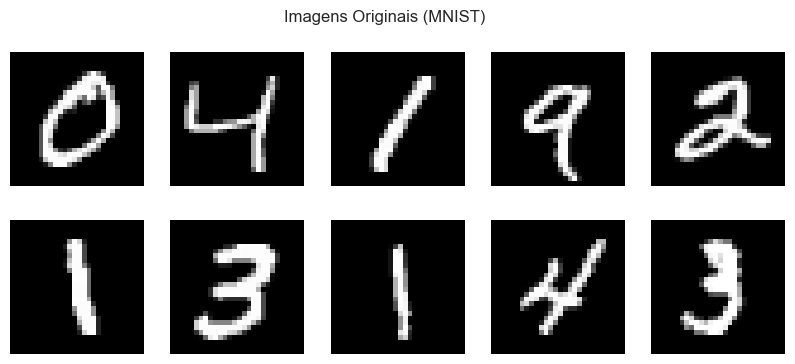

In [2]:
# Carregando bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist # Importação do dataset

# Configurando estilo de gráficos
plt.style.use("seaborn-v0_8-darkgrid")  # Configurando o estilo Seaborn com grid escuro

# Carregar o dataset MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizar as imagens para valores entre 0 e 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Redimensionar para o formato correto
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Visualizar algumas imagens
plt.figure(figsize=(10, 4))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle("Imagens Originais (MNIST)")
plt.show()


## Adicionando Ruído ao Dataset

Para este experimento, adicionaremos **ruído gaussiano** às imagens do MNIST. Isso simula imagens que podem estar corrompidas por interferências ou borrões.

---


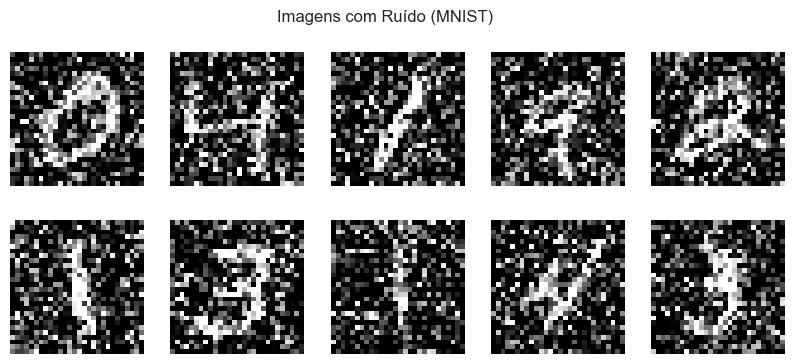

In [3]:
# Adicionar ruído às imagens
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Garantir que os valores estejam no intervalo [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Visualizar imagens com ruído
plt.figure(figsize=(10, 4))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle("Imagens com Ruído (MNIST)")
plt.show()


## Criando o Autoencoder

Um Autoencoder consiste em duas partes:
1. **Encoder (Codificador):** comprime os dados para um espaço latente menor.
2. **Decoder (Decodificador):** reconstrói os dados originais a partir da codificação.

Vamos implementar um Autoencoder com as seguintes camadas:
- Encoder: [784 -> 128 -> 64 -> 32 neurônios].
- Decoder: [32 -> 64 -> 128 -> 784 neurônios].

---


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Dimensão da entrada (28x28 pixels = 784)
input_dim = 784

# Definição do Encoder
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Definição do Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Criar o modelo Autoencoder
autoencoder = Model(input_img, decoded)

# Compilar o modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

## Treinando o Autoencoder

Vamos treinar o modelo usando as imagens ruidosas como entrada e as imagens originais como saída. Isso permite que o Autoencoder aprenda a remover o ruído.

---


In [5]:
# Treinamento do Autoencoder
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3360 - val_loss: 0.2112
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1956 - val_loss: 0.1749
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1716 - val_loss: 0.1603
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1589 - val_loss: 0.1526
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1518 - val_loss: 0.1465
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1457 - val_loss: 0.1420
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1411 - val_loss: 0.1385
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1379 - val_loss: 0.1360
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1356 - val_loss: 0.1338
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1338 - val_loss: 0.1318


## Avaliando o Modelo

Agora, vamos usar o modelo treinado para reconstruir as imagens e avaliar a eficácia da remoção de ruído.

---


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


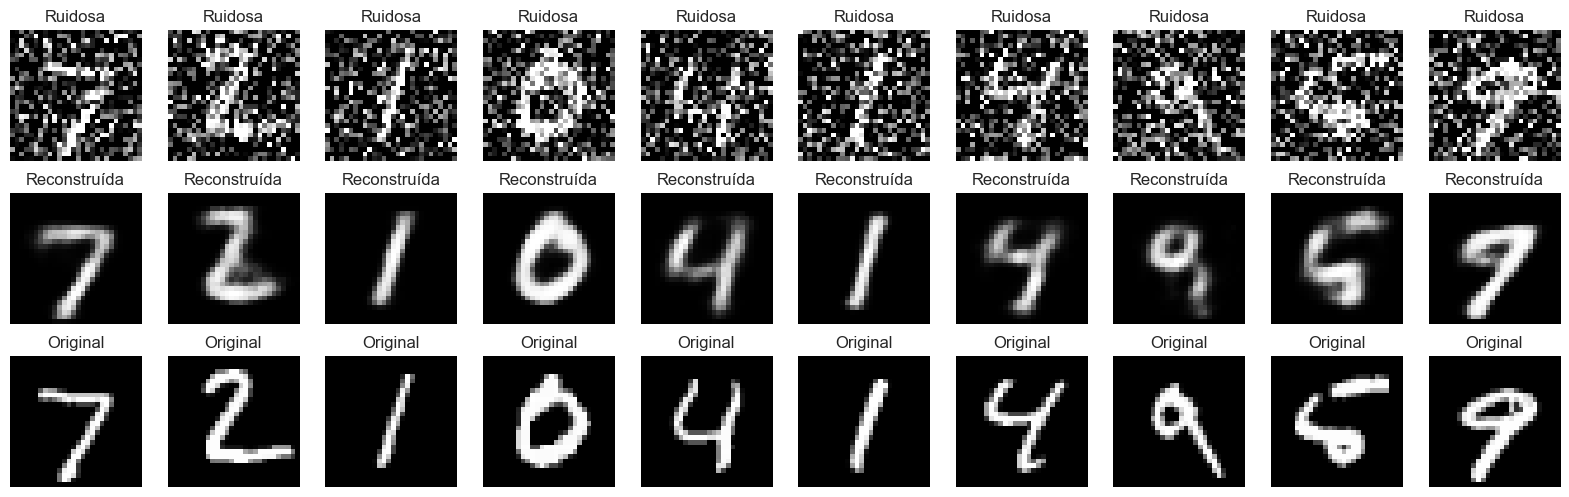

In [6]:
# Reconstruir as imagens
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualizar resultados
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Imagens com ruído
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Ruidosa")
    plt.axis('off')
    
    # Imagens reconstruídas
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstruída")
    plt.axis('off')

    # Imagens originais
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
plt.show()


## Conclusão
Aplicação de Autoencoders e como eles podem ser usados para remover ruído de imagens.
